In [1]:
import numpy as np
import plotly.graph_objects as go
import snippets.plotters

Lets consider the following two points:
$$
\mathbf a_1 = \begin{bmatrix}
1 \\
5 \\
\end{bmatrix}
$$

and 
$$
\mathbf a_2 = \begin{bmatrix}
2 \\
3 \\
\end{bmatrix}
$$

These two points are linearly independent, so any linear combination of these two points will span the entire $\mathbf R^2$ space. Lets say I have a third point in mind - 
$$
\mathbf b = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

What linear combinations of $a_1$ and $a_2$ will give me this third point? Because these are linearly independent, there exists exactly one solution to every such $b \in \mathbf R^2$.

$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
\end{bmatrix} \begin{bmatrix}
x \\
y \\
\end{bmatrix} = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

The above equation can be interpreted in one of two ways. In the columnar linear algebra way $x$ and $y$ are just the co-effcients of $\mathbf a_1$ and $\mathbf a_2$ - 

$$
x \begin{bmatrix}
1 \\
5 \\
\end{bmatrix} + y \begin{bmatrix}
2 \\
3 \\
\end{bmatrix} = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

In the simultaneous equation way, $x$ and $y$ are points on the following two lines

$$
x + 2y = 18 \\
5x + 3y = 41 \\
$$

The funny thing between these two interpretations is that in $\mathbf a_1$, the $x$ and $y$ coordinates are $x = 1$ and $y = 5$. But in the simultaneous equation interpretation, both the elements of $\mathbf a_1$ will show up as co-efficients of $x$, i.e., the coordinates become the coefficients and the coefficients $(x, y)$ become the coordinates. Graphically the lines drawn for the simultaneous equations have nothging to do with the points $\mathbf a_1$ and $\mathbf a_2$.

In [2]:
a1 = np.array([1, 5])
a2 = np.array([2, 3])
A = np.concatenate((a1.reshape(-1, 1), a2.reshape(-1, 1)), axis=1)
b = np.array([18, 41])
x = np.linalg.inv(A) @ b
print(A)
print(b)
print(x)

[[1 2]
 [5 3]]
[18 41]
[4. 7.]


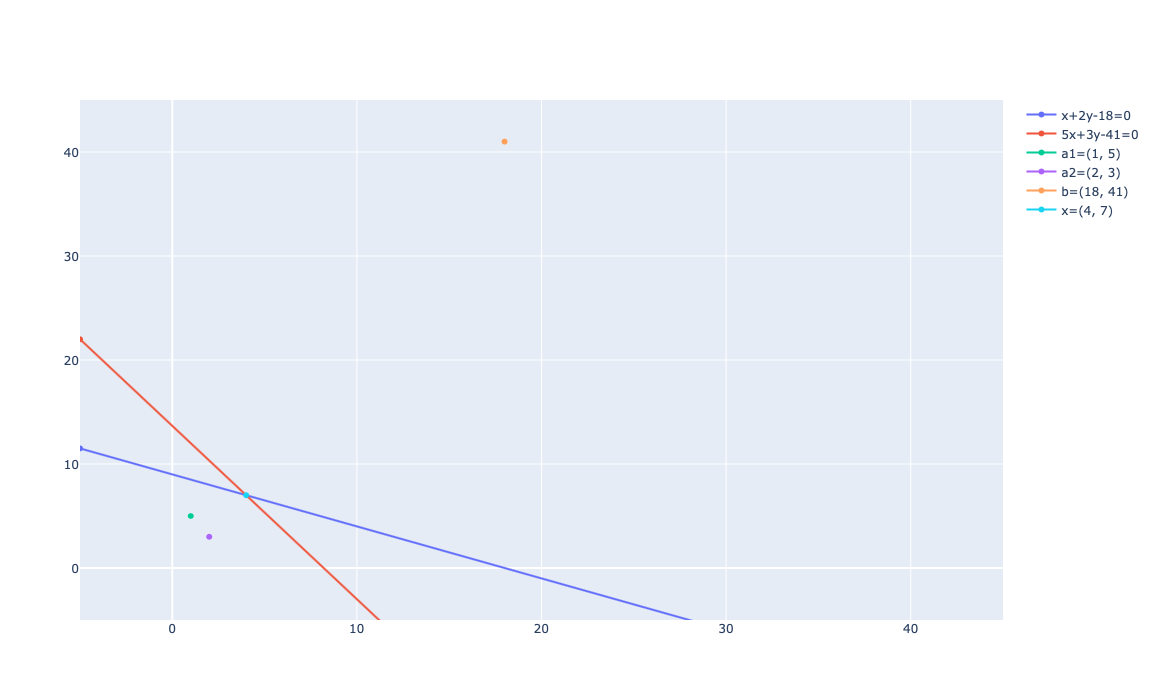

In [3]:
x_lower, x_upper = -5, 45
fig = go.Figure(layout_width=700, layout_height=700)
fig.update_xaxes(range=[x_lower, x_upper])
fig.update_yaxes(range=[x_lower, x_upper])
fig.plot_line(a=1, b=2, c=-18, name="x+2y-18=0")
fig.plot_line(a=5, b=3, c=-41, name="5x+3y-41=0")
fig.plot_point(1, 5, name="a1=(1, 5)")
fig.plot_point(2, 3, name="a2=(2, 3)")
fig.plot_point(18, 41, name="b=(18, 41)")
fig.plot_point(4, 7, name="x=(4, 7)")
fig.show()

## Affine Set

If the coefficient $\mathbf x$ is chosen s.t that $\mathbf x[0] = \theta \text{  and  } \mathbf x[1] = 1 - \theta$ then the resulting $\mathbf b$ will lie on the line connecting $\mathbf a_1$ and $\mathbf a_2$.

All such $\mathbf b$s that are a result of $\mathbf x$s whose elements add upto 1 lie on the same line as the column vectors of $A$ and are called an affine set. When we add a further constraint that all the elements have to be semi-positive, then the resulting point will always lie in between the line segment of $\mathbf a_1$ and $\mathbf a_2$. These points are called the convext set.

In [4]:
θ = 0.7
x = np.array([θ, 1-θ])
b = A @ x
b

array([1.3, 4.4])

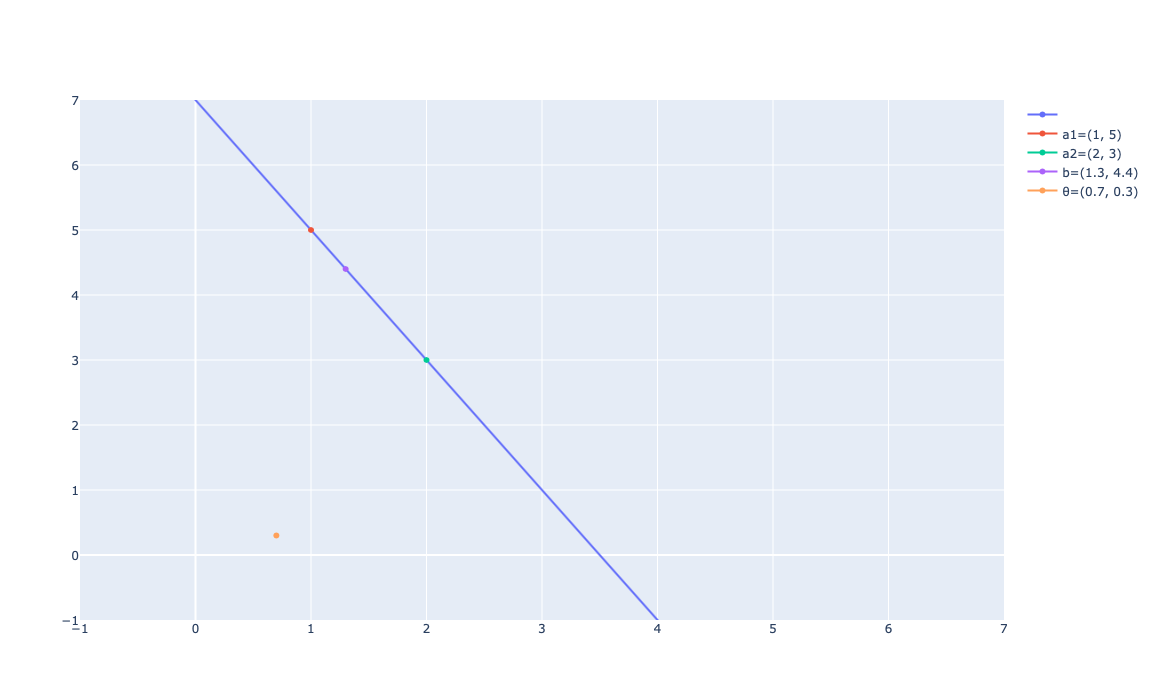

In [5]:
x_lower, x_upper = -1, 7
fig = go.Figure(layout_width=700, layout_height=700)
fig.update_xaxes(range=[x_lower, x_upper])
fig.update_yaxes(range=[x_lower, x_upper])
fig.plot_line(p1=a1, p2=a2)
fig.plot_point(a1[0], a1[1], name="a1=(1, 5)")
fig.plot_point(a2[0], a2[1], name="a2=(2, 3)")
fig.plot_point(b[0], b[1], name="b=(1.3, 4.4)")
fig.plot_point(x[0], x[1], name="θ=(0.7, 0.3)")
fig.show()

In [6]:
θ = -0.7
x = np.array([θ, 1-θ])
b = A @ x
b

array([2.7, 1.6])

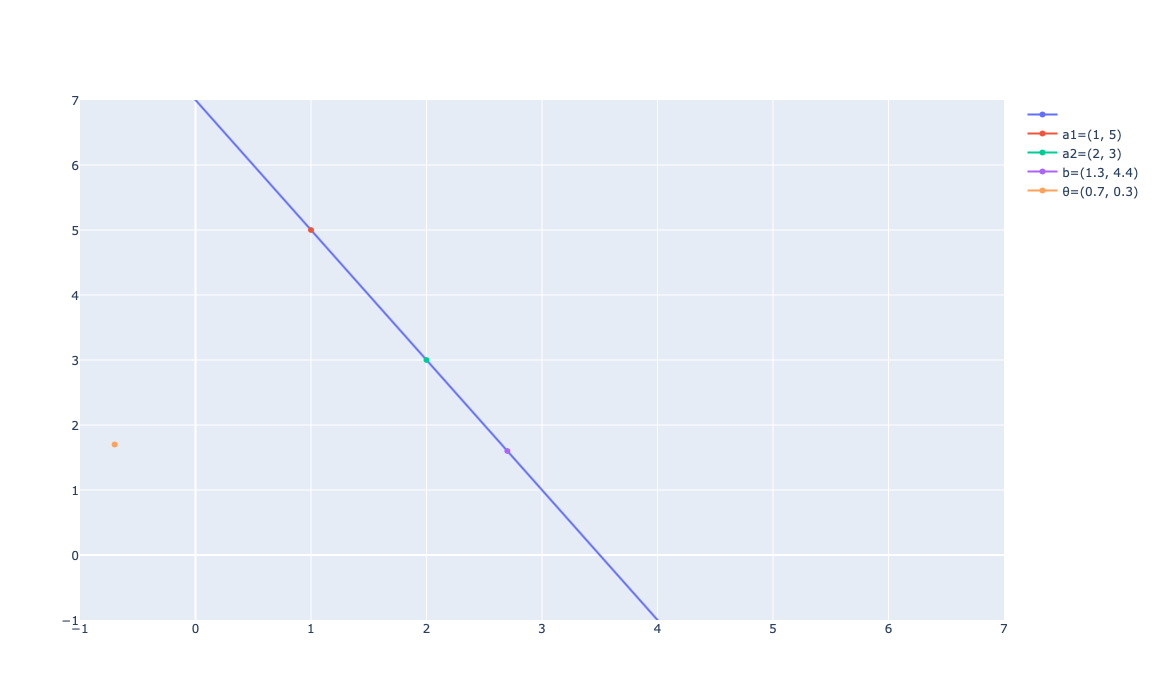

In [7]:
x_lower, x_upper = -1, 7
fig = go.Figure(layout_width=700, layout_height=700)
fig.update_xaxes(range=[x_lower, x_upper])
fig.update_yaxes(range=[x_lower, x_upper])
fig.plot_line(p1=a1, p2=a2)
fig.plot_point(a1[0], a1[1], name="a1=(1, 5)")
fig.plot_point(a2[0], a2[1], name="a2=(2, 3)")
fig.plot_point(b[0], b[1], name="b=(1.3, 4.4)")
fig.plot_point(x[0], x[1], name="θ=(0.7, 0.3)")
fig.show()

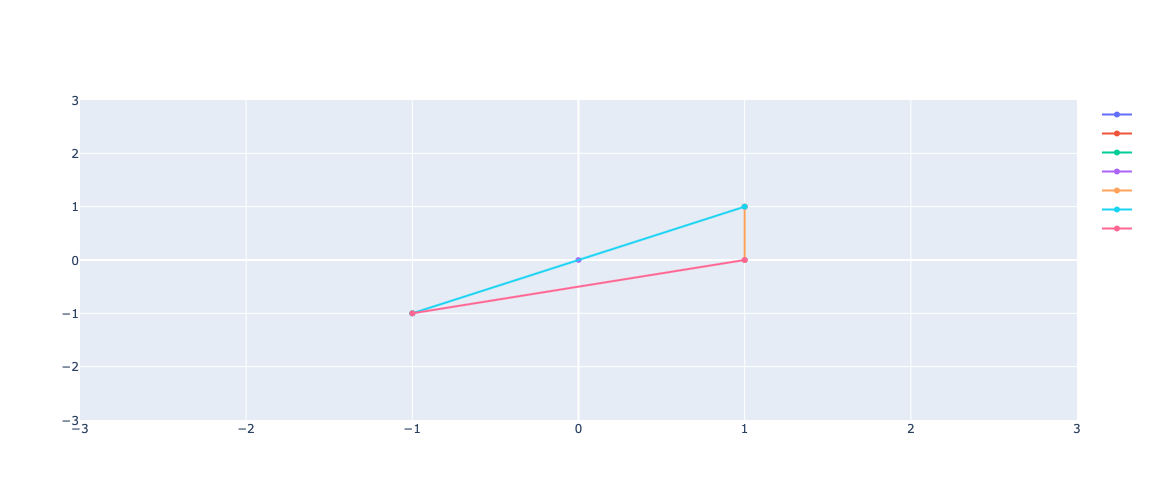

In [8]:
x_lower, x_upper = -3, 3
fig = go.Figure(layout_width=500, layout_height=500)
fig.update_xaxes(range=[x_lower, x_upper])
fig.update_yaxes(range=[x_lower, x_upper])
fig.plot_point(1, 0)
fig.plot_point(1, 1)
fig.plot_point(-1, -1)
fig.plot_point(0, 0)
fig.plot_line_segment((1, 0), (1, 1))
fig.plot_line_segment((1, 1), (-1, -1))
fig.plot_line_segment((1, 0), (-1, -1))
fig.show()